# Simulación acto graduación




Listado de las personas que van a desfilar,

tiempos,

asiento,

si no va la persona,

tiempo total de la graduación, etc..




> # Importar libreria

In [1]:
# install Pint if necessary
try:
    import pint
except ImportError:
    !pip install pint

# download modsim.py if necessary
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 10.8 MB/s eta 0:00:00
Downloaded modsim.py


In [2]:
# import functions from modsim
from modsim import *
#import random
import random as r

from numpy import *

> # Código
---

In [3]:
poblacionEst = r.randint(500,801)

In [4]:
import random as r

In [5]:
system = System(tiempo_total = 0,
                poblacion = int(poblacionEst - poblacionEst * 0.02)
                )

print(system.poblacion)

781


In [6]:
t_total = system.tiempo_total

In [7]:
diaUno = round(system.poblacion * 0.45)
diaDos = round(system.poblacion * 0.55)
print(diaUno, diaDos)

351 430


In [8]:
def varEstado():
  import random as r
  state = State(apertura = r.randint(10, 15), desfile_autoridades = r.randint(4, 11),
                himnos = r.randint(6, 8), rectoria_palabras = r.randint(20, 40),
                juramento = 2,
                discurso_egresados = r.randint(5,8),
                himnoUnphu = 3,
                salida = r.randint(6, 11)
                )
  return state

In [9]:
def varEntrega():
  import random as r
  state = State(entregaDiplomas = r.uniform(0.03, 0.30),
                premios_entregas = r.randint(15, 21)
                )
  return state

In [10]:
def run_simulation(poblacion):
  s = varEstado()
  z = varEntrega()
  faseInicial = s.apertura + s.desfile_autoridades + s.himnos + s.rectoria_palabras

  results = TimeSeries()
  results[t_total] = poblacion
  results[faseInicial] = poblacion

  count = 0
  i = faseInicial
  graduadosFinal = poblacion

  while count < poblacion:
    i += z.entregaDiplomas
    graduadosFinal -= 1
    results[i] = graduadosFinal
    count += 1

  results[i + s.juramento] = 0

  import random as r
  count = 0
  p0 = poblacion * r.uniform(0.05, 0.08)

  while count < poblacion:
    i += z.entregaDiplomas
    p0 -= 1
    results[i] = 0
    count += 1

  results[i + s.discurso_egresados] = graduadosFinal
  results[i + s.himnoUnphu] = graduadosFinal
  results[i + s.salida ] = graduadosFinal

  return round(results)

In [11]:
r = run_simulation(diaUno)
r2 = run_simulation(diaDos)
print(r) #135.20      0

Time
0.000000      351
47.000000     351
47.242071     350
47.484143     349
47.726214     348
             ... 
216.692091      0
216.934163      0
223.934163      0
219.934163      0
222.934163      0
Name: Quantity, Length: 708, dtype: int64


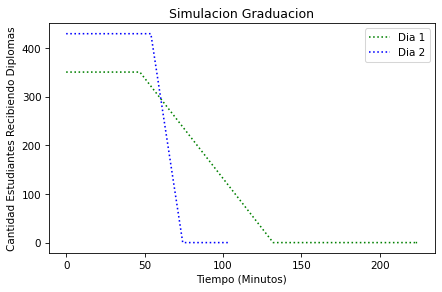

In [12]:
r.plot(color='green', label='Dia 1', style = ':' )
r2.plot(color='blue', label='Dia 2', style = ':' )
decorate(title= 'Simulacion Graduacion',
             xlabel = 'Tiempo (Minutos)',
             ylabel = 'Cantidad Estudiantes Recibiendo Diplomas' )

In [13]:
m_h = lambda x:  round(x.index[-1] / 60, 2)

In [14]:
print("Graduacion dia 1: ", m_h(r), " Hora")
print("Graduacion dia 2: ", m_h(r2), " Hora")

Graduacion dia 1:  3.72  Hora
Graduacion dia 2:  1.73  Hora
